In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set_style('darkgrid')

In [2]:
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"

fatal: destination path '21-Days-21-Projects-Dataset' already exists and is not an empty directory.


In [3]:
netflix_df = pd.read_csv('/Users/del/GfG/Practice/netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


**Interpretation:**
- 1. The given dataset has 7787 entries.
- 2. The `date_added` column is `object` type not a `datetime` object. Needs to be converted to datetime. 
- 3. `director`, `cast`, `country`, `date_added`, and `rating` all have missing values.
- 4. `director` has the most significant number of null values.

In [6]:
netflix_df['director'] = netflix_df['director'].fillna('Unknown')
netflix_df['cast'] = netflix_df['cast'].fillna('Unknown')

In [7]:
mode_country = netflix_df['country'].mode()[0]
netflix_df['country'] = netflix_df['country'].fillna(mode_country)

In [8]:
netflix_df.dropna(subset=['date_added', 'rating'], inplace=True)

In [9]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format='mixed', dayfirst=False)

In [10]:
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month

In [11]:
print("Missing values after cleaning:")
print(netflix_df.isnull().sum())
print("\nData types after transformation:")
print(netflix_df.dtypes)

Missing values after cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

Data types after transformation:
show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added               int32
month_added              int32
dtype: object


#### 4.1 Distribution of content type:

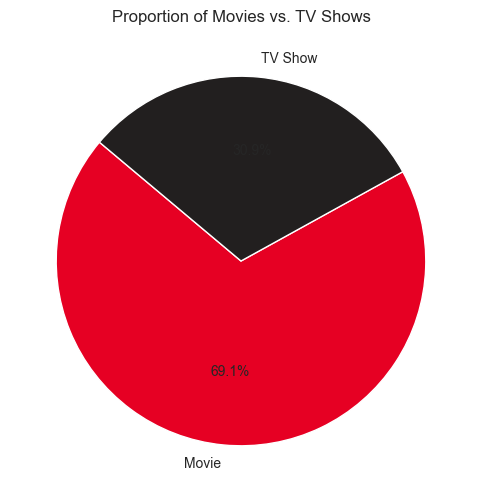

In [13]:
plt.figure(figsize=(8, 6))
type_counts = netflix_df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#e60023', '#221f1f'])
plt.title('Proportion of Movies vs. TV Shows')
plt.ylabel('')
plt.show()

**Insight:** 
- 1. The Netflix content is dominated by Movies, around 70% of the content.

#### 4.2 Content addition over time

<Figure size 1400x800 with 0 Axes>

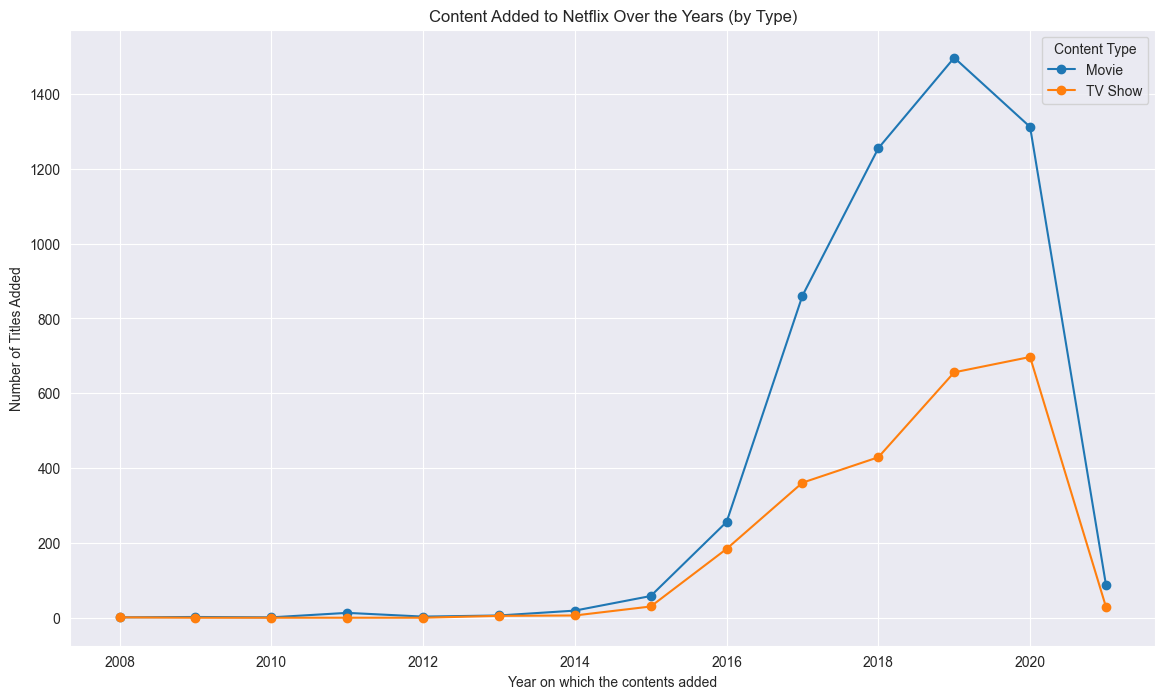

In [99]:
content_over_time = netflix_df.groupby(['year_added', 'type']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
content_over_time.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Content Added to Netflix Over the Years (by Type)')
plt.xlabel('Year on which the contents added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

**Insights:** 
- 1. The content types movies and TV shows, both grew significantly.
- 2. Movies accelerated much more dramatically, peaking around 2019.
- 3. The peak deaccelerated in 2020 and 2021, which could be due to the COVID-19 pandemic. 

#### 4.3 The most popular genres

In [20]:
genres = netflix_df.assign(genre=netflix_df['listed_in'].str.split(', ')).explode('genre')

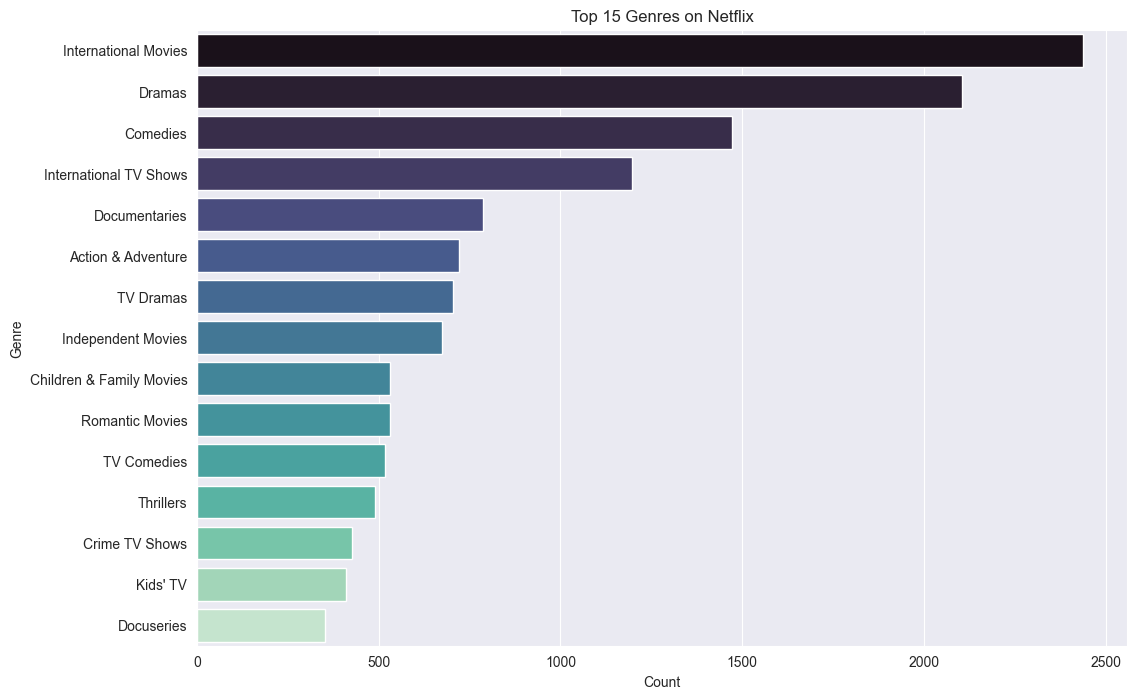

In [21]:
top_genres_counts = genres['genre'].value_counts().reset_index()
top_genres_counts.columns = ['genre', 'count'] 

top_genres_counts_plot = top_genres_counts.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y='genre', x='count', data=top_genres_counts_plot, palette='mako', hue='genre', legend=False)
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

**Insights:** 
- 1. International Movies are the most common genre tag.
- 2. Dramas and Comedies are the next common genre tags. 

#### 4.4 Distribution of content duration

In [24]:
movies_df = netflix_df[netflix_df['type'] == 'Movie'].copy()
tv_shows_df = netflix_df[netflix_df['type'] == 'TV Show'].copy()

In [25]:
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '').astype(int)

tv_shows_df['seasons'] = tv_shows_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

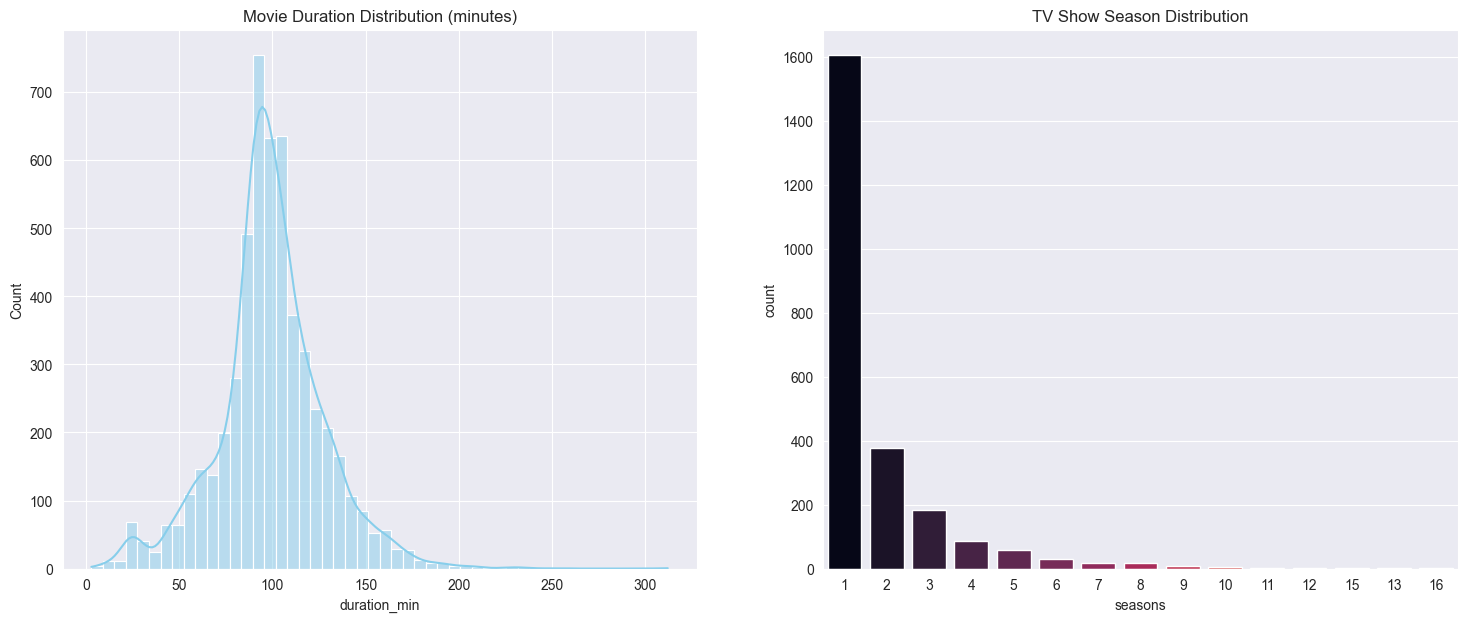

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

sns.histplot(ax=axes[0], data=movies_df, x='duration_min', bins=50, kde=True, color='skyblue').set_title('Movie Duration Distribution (minutes)')

sns.countplot(ax=axes[1], x='seasons', data=tv_shows_df, palette='rocket', order=tv_shows_df['seasons'].value_counts().index, hue='seasons', legend=False).set_title('TV Show Season Distribution')

plt.show() 

**Insights:**
- 1. The majority of movies on Netflix is around 100 minutes long, which is standard for feature films.
- 2. The majority of TV shows on Netflix are short-lived, with only 1 season. 

#### 4.5 Geographical Analysis

In [102]:
countries = netflix_df.assign(country=netflix_df['country'].str.split(', ')).explode('country')

In [104]:
top_countries_counts = countries['country'].value_counts().reset_index()
top_countries_counts.columns = ['country', 'count'] 

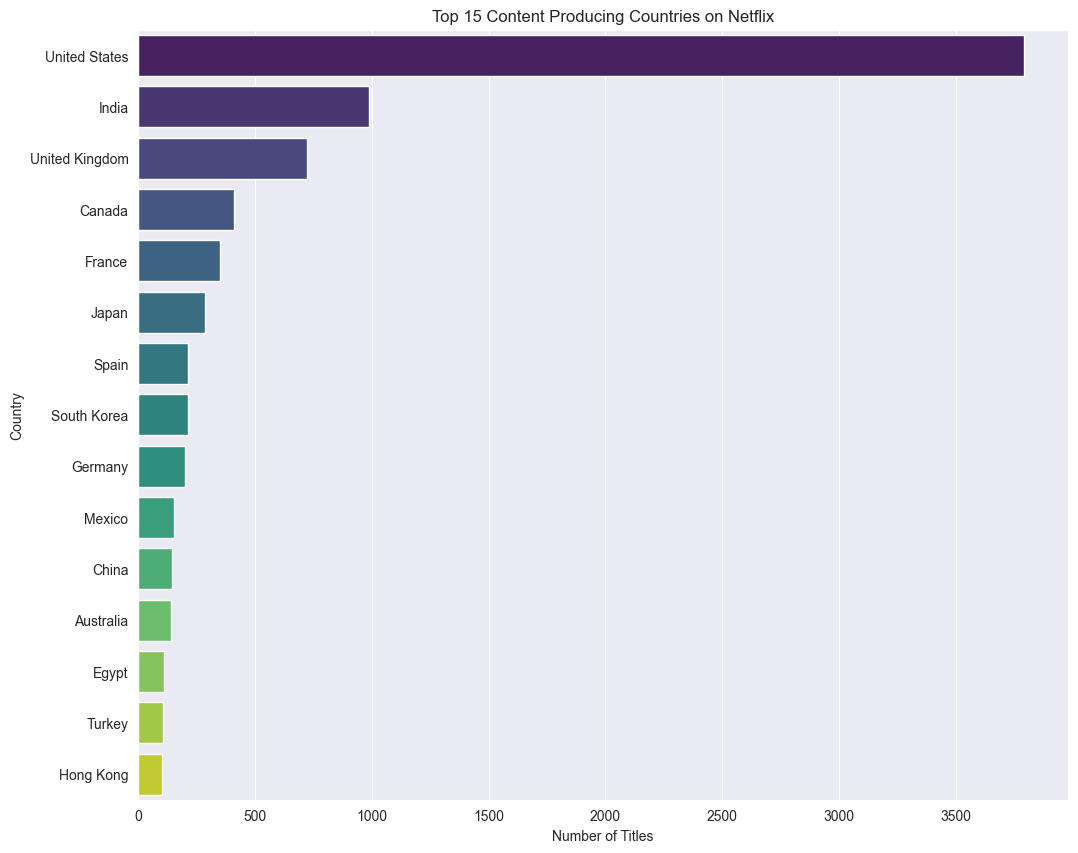

In [31]:
top_countries_counts_plot = top_countries_counts.head(15)

plt.figure(figsize=(12, 10))
sns.barplot(y='country', x='count', data=top_countries_counts_plot, palette='viridis', hue='country', legend=False)
plt.title('Top 15 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

**Insights:** 
- 1. The United States is the largest producer of content available on Netflix.
- 2. India is the second largest, which explains why so many of the top actors were from India. The UK, Japan, and South Korea also represent major content markets for the platform, emphasizing its global nature.

#### 4.6 Maturity ratings of the content

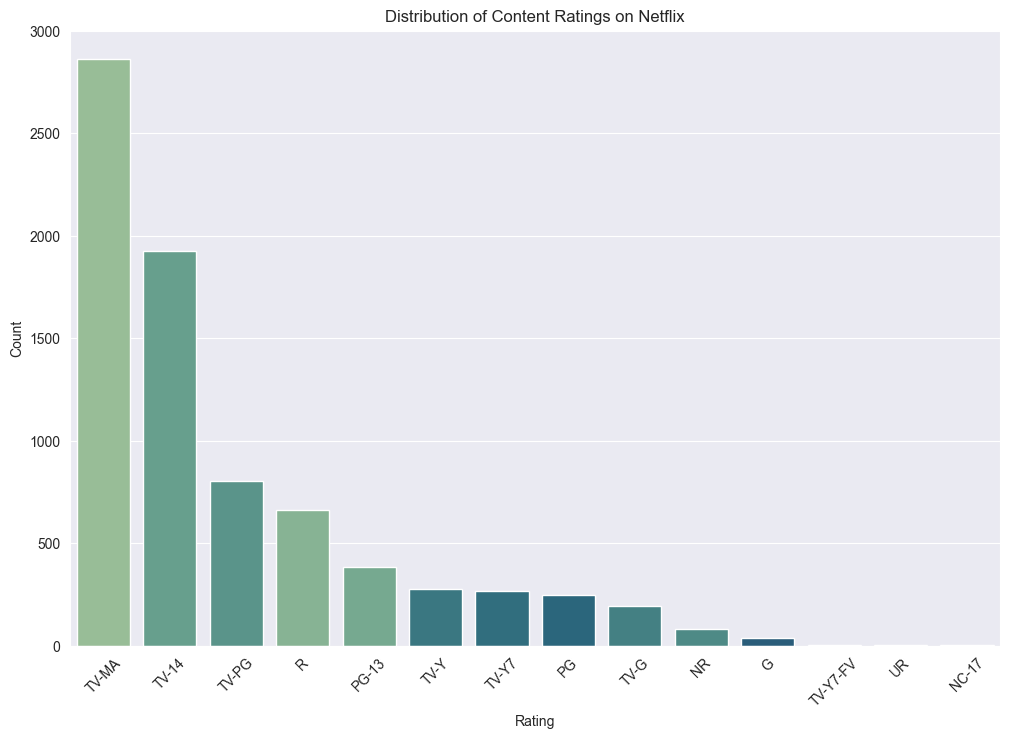

In [35]:
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=netflix_df, order=netflix_df['rating'].value_counts().index, palette='crest', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show() 

**Insight:** 
- 1. A largest portion of Netflix's content is aimed at mature audiences, with `TV-MA` (Mature Audience) and `TV-14` (Parents Strongly Cautioned). 

#### 4.7. Distribution of content age when added to Netflix

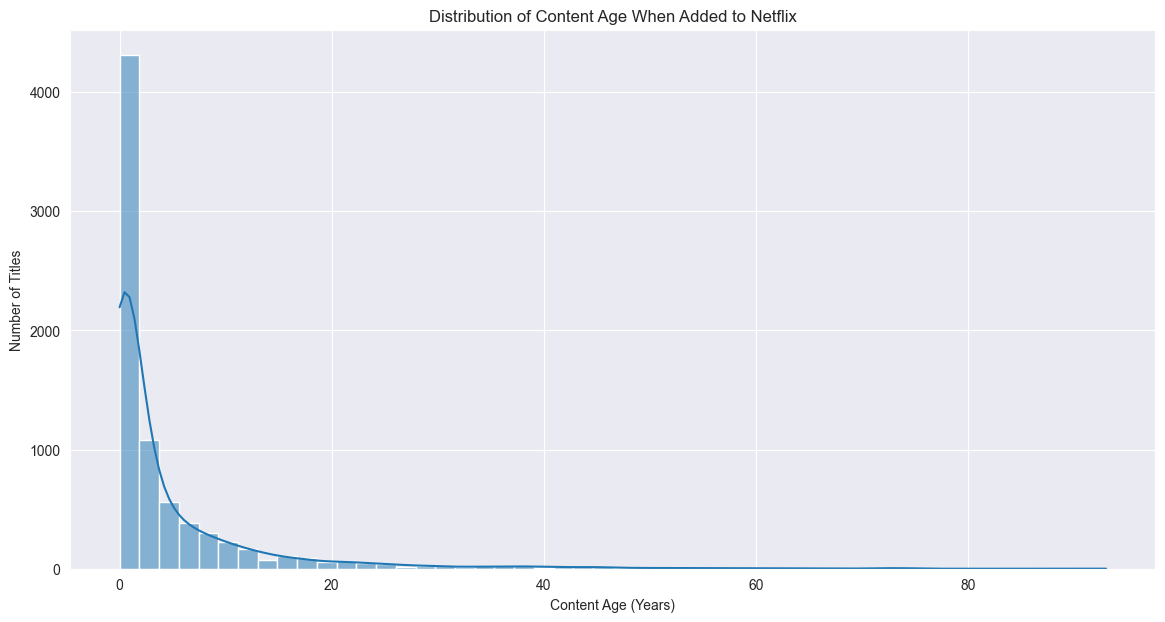

In [37]:
netflix_df['age_on_netflix'] = netflix_df['year_added'] - netflix_df['release_year']

content_age = netflix_df[netflix_df['age_on_netflix'] >= 0]

plt.figure(figsize=(14, 7))
sns.histplot(data=content_age, x='age_on_netflix', bins=50, kde=True)
plt.title('Distribution of Content Age When Added to Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.show()

**Insights:** 
- 1. The highest spike at `0` indicates that a significant amount of content is added in the same year it's released, which is characteristic of "Netflix Originals".
- 2. The long tail, showing that Netflix also heavily invests in acquiring licensed content that can be decades old. 

#### 4.8. Movie duration by Top genres

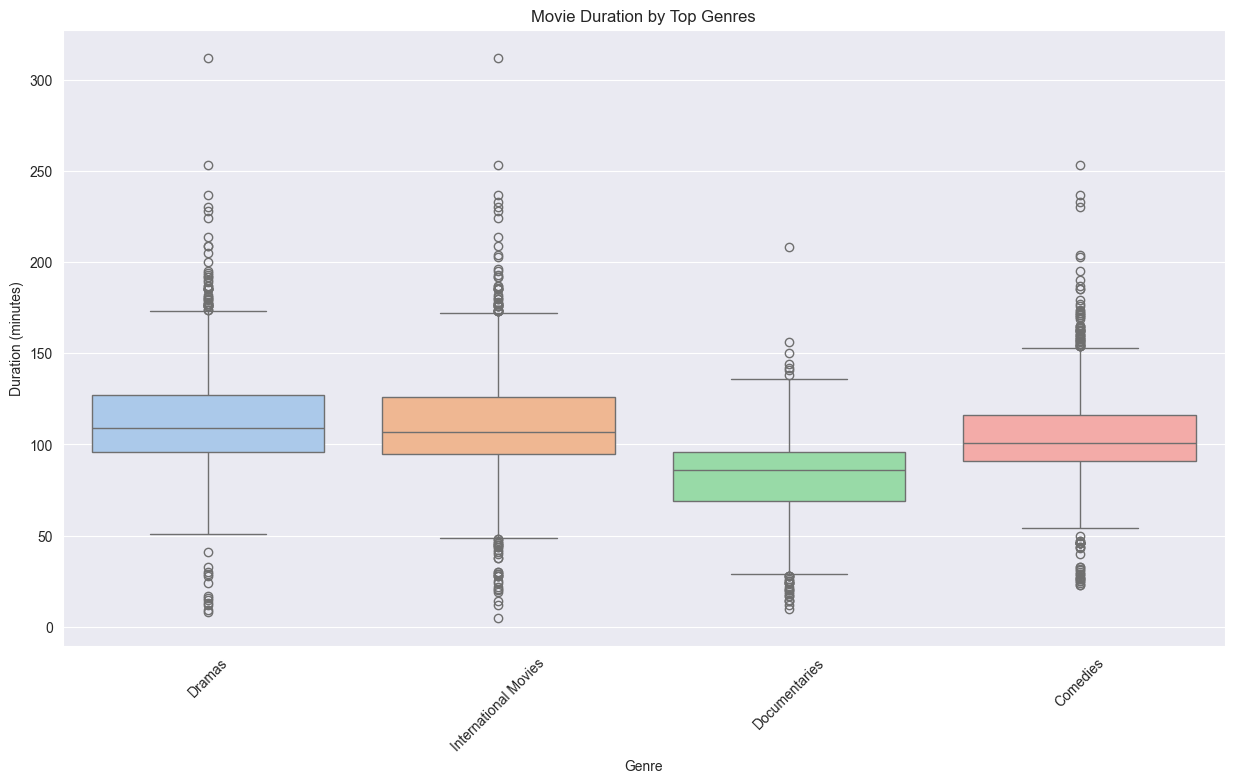

In [39]:
top_genres = genres['genre'].value_counts().index[:5]
genres_movies = genres[(genres['type'] == 'Movie') & (genres['genre'].isin(top_genres))].copy()
genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(15, 8))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='pastel', hue='genre', legend=False)
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

**Insight:** 
- 1. The median duration for most top genres is similar (around 100 minutes) and their distribution is found to be broader. 

#### 4.9. WordCloud 

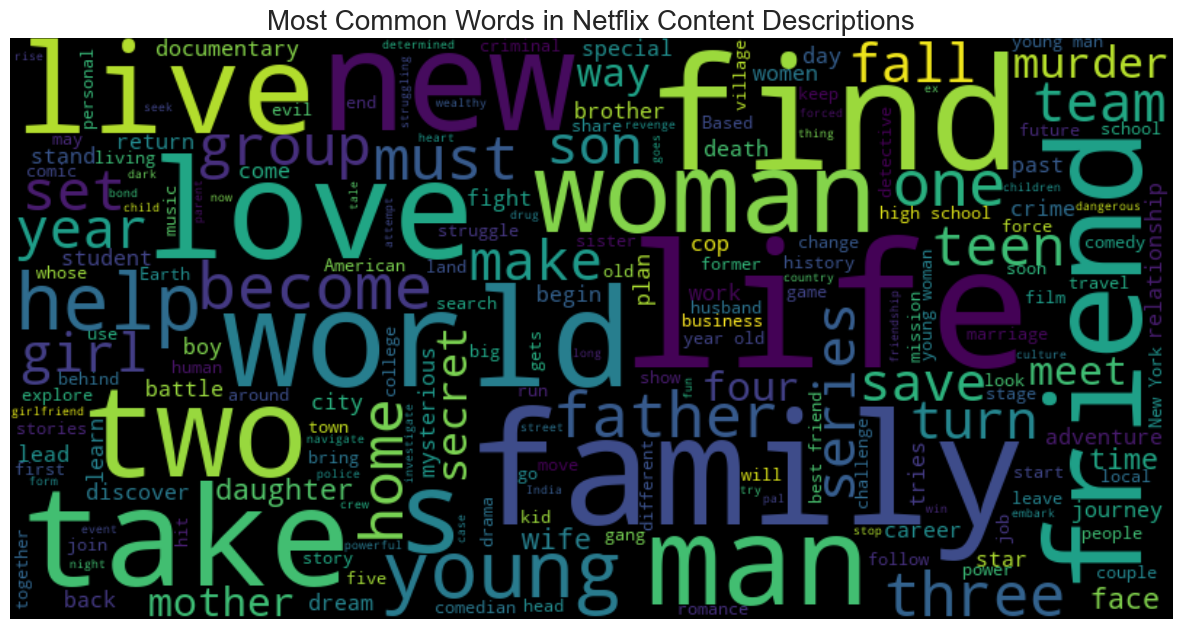

In [41]:
text = ' '.join(netflix_df['description'])

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

**Insights**
- 1. The word cloud highlights common themes and subjects. Words like "life," "family," "love," "young," "friends," and "world" are suggesting that much of the content revolves around human relationships and personal journeys.
- 2. Action-oriented words like "find," "secret," and "new" also appear frequently.

# Submission Q's

## 1. How has the distribution of content ratings changed over time?

<Figure size 1400x800 with 0 Axes>

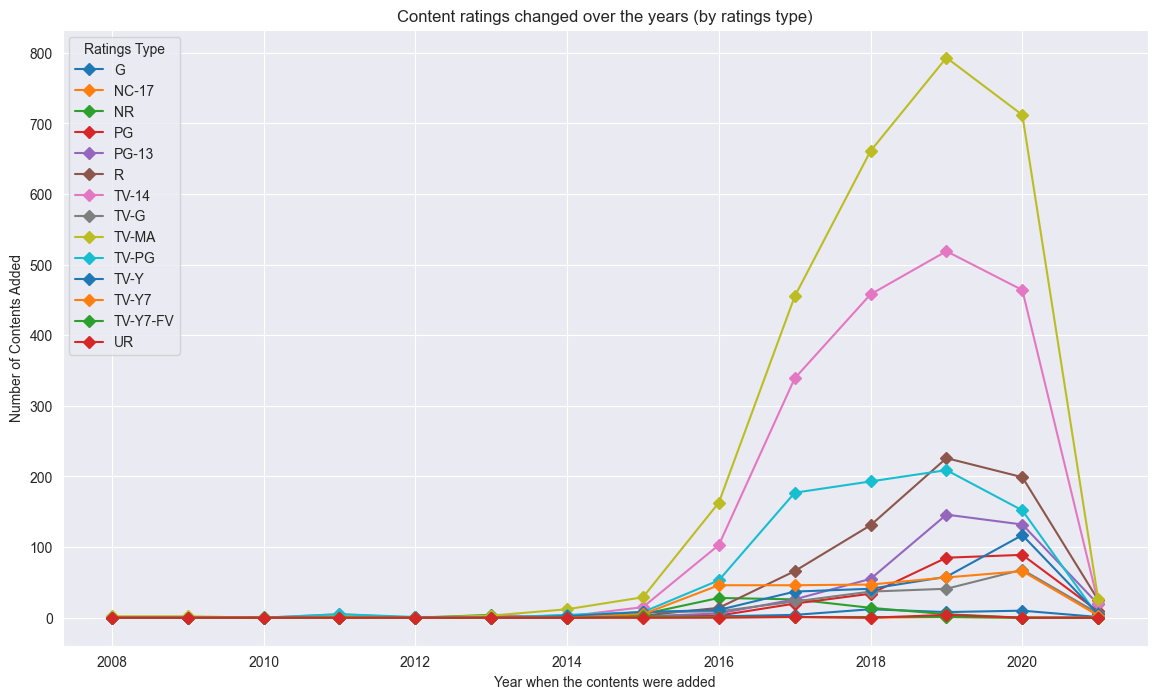

In [140]:
content_ratings_over_time = netflix_df.groupby(['year_added', 'rating']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
content_ratings_over_time.plot(kind='line', marker='D', figsize=(14, 8)) 
plt.title('Content ratings changed over the years (by ratings type)')
plt.xlabel('Year when the contents were added')
plt.ylabel('Number of Contents Added')
plt.legend(title='Ratings Type')
plt.grid(True)
plt.show()

**Insights**
- 1. TV-MA (for mature audiences only) has shown to accerelate as the highest during 2019 followed by TV-14.
- 2. Rest of the ratings have comparatively lower accerelation, however the peak is found to be during 2019 for majority of the ratings. Which also aligns with the content addition majorly during that period. 

## 2. Is there a relationship between content age and its type (Movie vs. TV Show)?

<Figure size 1400x800 with 0 Axes>

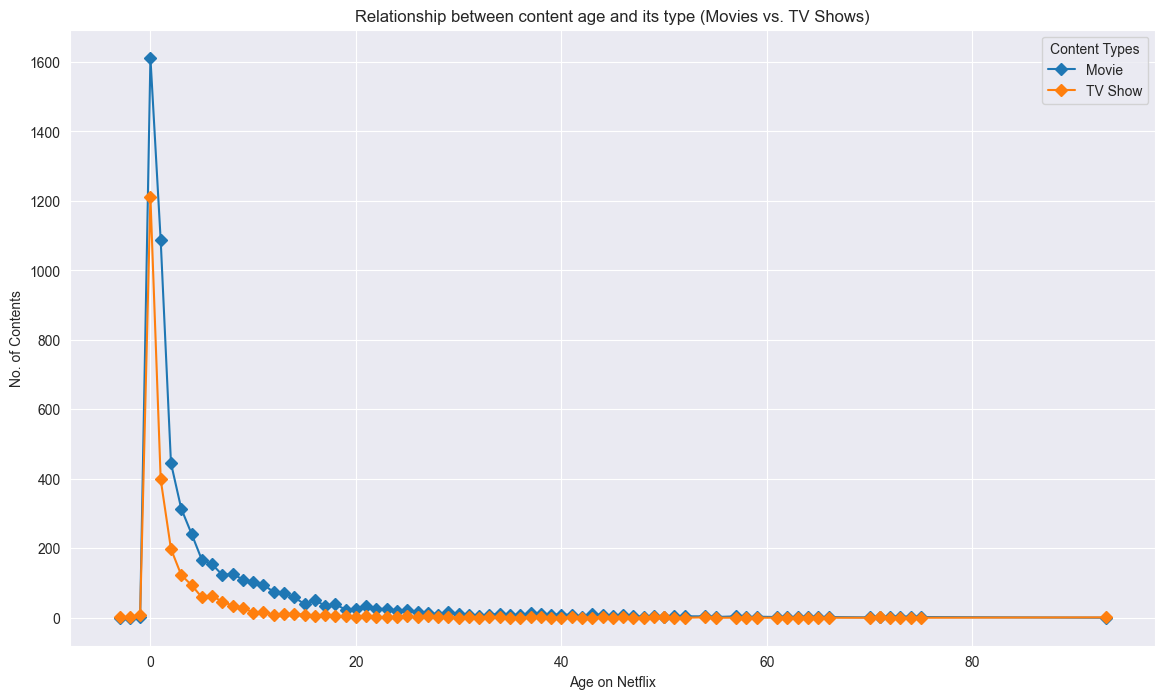

In [48]:
contentageVsType = netflix_df.groupby(['age_on_netflix','type']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
contentageVsType.plot(kind='line', marker='D', figsize=(14, 8)) 
plt.title('Relationship between content age and its type (Movies vs. TV Shows)')
plt.xlabel('Age on Netflix') 
plt.ylabel('No. of Contents')
plt.legend(title='Content Types')
plt.grid(True)
plt.show() 

**Insights**
- 1. The plot clearly shows that majority of the contents are the Netflix Originals, where Movies are higher then TV shows. 
- 2. The long tail shows the number of contents decreases with their increase in age on Netflix. Which suggests Netflix has higher focus on newly released contents. 

## 3. Can we identify any trends in content production based on the release year vs. the year added to Netflix?

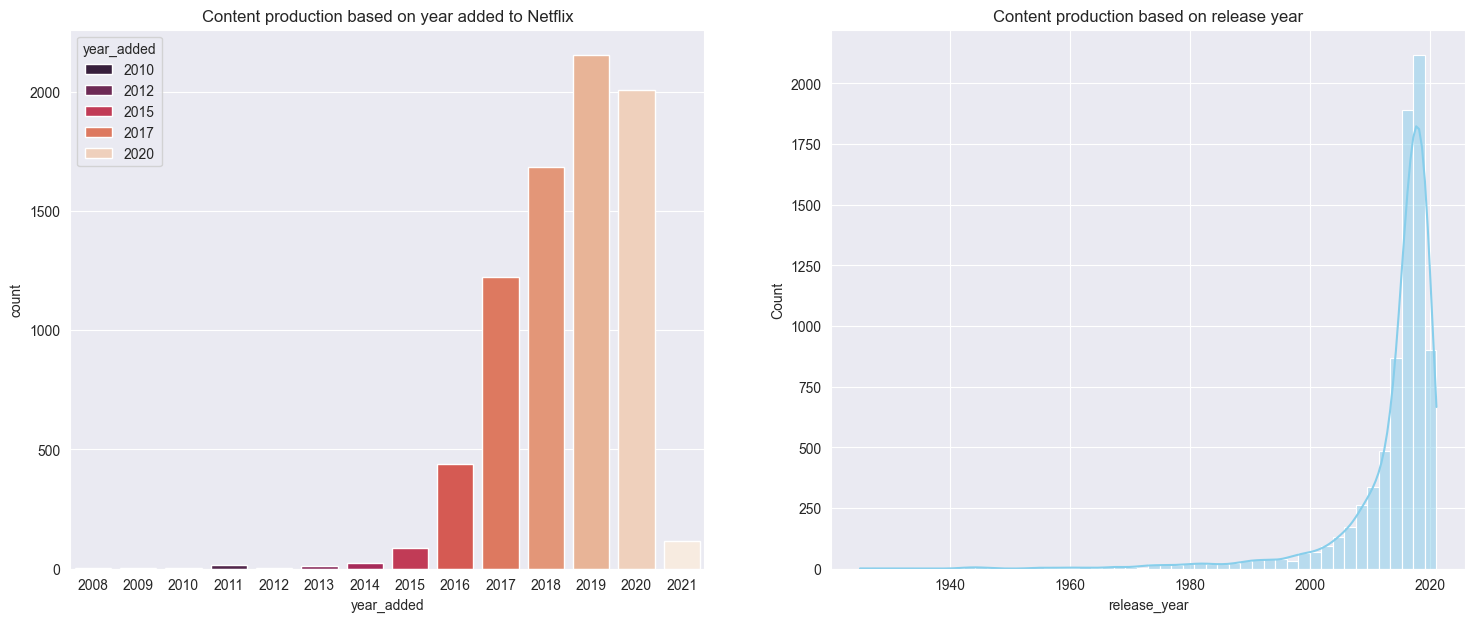

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

sns.countplot(ax=axes[0], x='year_added', data=netflix_df, palette='rocket', hue='year_added').set_title('Content production based on year added to Netflix')
sns.histplot(ax=axes[1], data=netflix_df, x='release_year', bins=50, kde=True, color='skyblue').set_title('Content production based on release year')
plt.show() 

**Insights**
- 1. Both the plots show similar trends. The number of content production increased over the years. However, the year 2020 was contradictory to the rest of the year's count of content production. 
- 2. A direct relationship can be concluded which also suggest about the Netflix Originals. 

## 4. What are the most common word pairs or phrases in content descriptions?

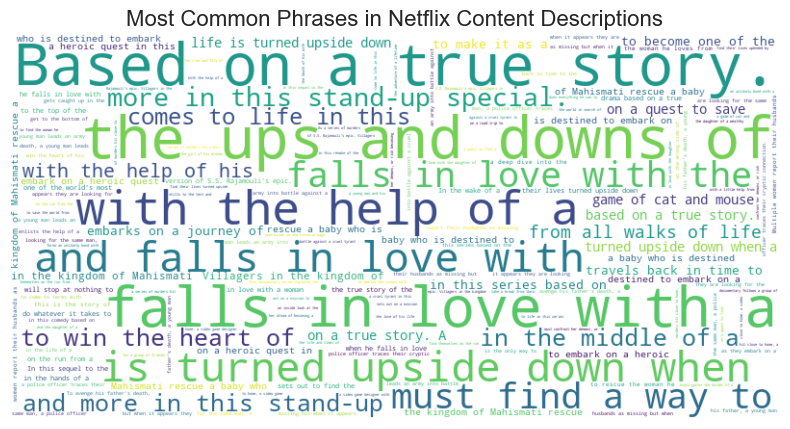

In [120]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

words = text.split()
def get_ngrams(words, n=5):
    return [" ".join(words[i:i+n]) for i in range(len(words)-n+1)] 

n = 5
phrases = get_ngrams(words, n)

phrase_counts = Counter(phrases)
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(phrase_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Phrases in Netflix Content Descriptions', fontsize=16)
plt.show() 

**Insights**
- 1. The wordcloud shows a higher frequency of word phrases like 'Based on a true story', 'the ups and downs', 'falls in love with'.
- 2. It suggests a story of love, life with ups and downs along with the support of people.  

## 5. Who are the top directors on Netflix?

In [122]:
top_directors_plot = netflix_df['director'].head(5)

In [124]:
directors = netflix_df.assign(directors=netflix_df['director'].str.split(', ')).explode('director')

In [126]:
top_directors = directors['director'].value_counts().reset_index()
top_directors.columns = ['director', 'count'] 
topdir=top_directors.drop(0)

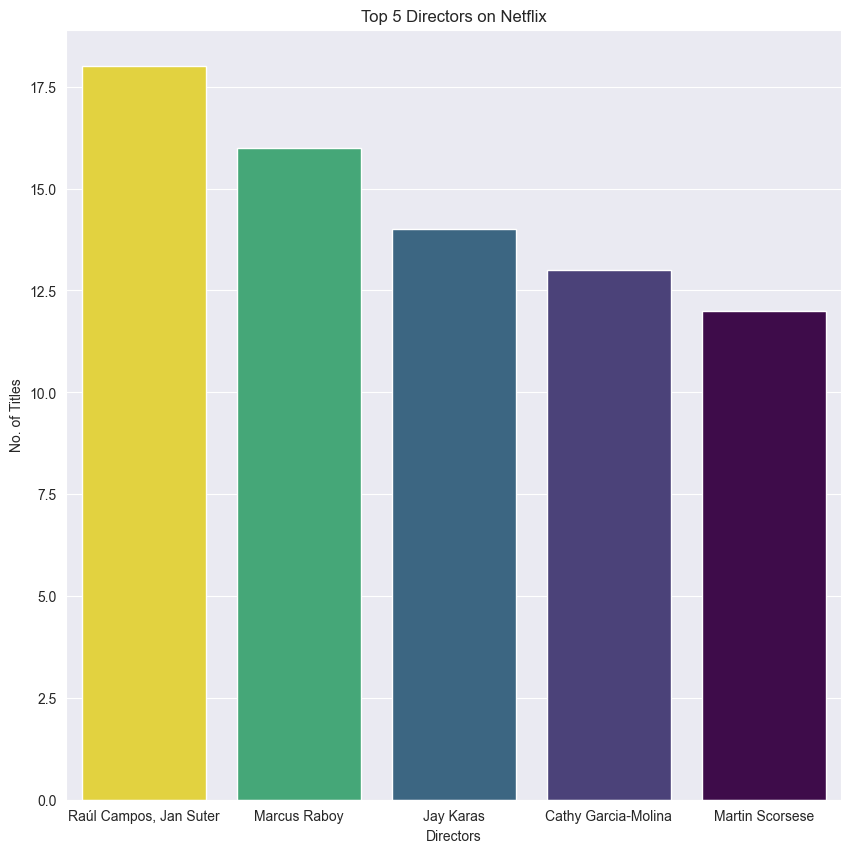

In [130]:
top_directors_plot = topdir.head(5) 

plt.figure(figsize=(10, 10))
sns.barplot(x='director', y='count', data=top_directors_plot, palette='viridis', hue='count', legend=False)
plt.title('Top 5 Directors on Netflix')
plt.xlabel('Directors')
plt.ylabel('No. of Titles')
plt.show() 

**Observation: The top 5 directors of Netflix are shown in the above barplot**

### Final Conclusion and Summary of Insights

This in-depth EDA of the Netflix dataset has revealed several key characteristics and strategies of the platform's content library.

**Key Findings:**
1. **Content Strategy:** Netflix's library is movie-heavy (~70%). Their strategy involves brand new originals (added the same year they are released).
2. **Global Dominance:** While the US is the top content producer, the platform is heavily international, with India being a massive contributor. 
3. **Target Audience:** The content library is skewed towards mature audiences, with `TV-MA` and `TV-14` being the most common ratings.
4. **Content Format & Genre:** Dramas and Comedies are universally popular genres. Most movies stick to a standard 100 minute runtime.
5. **Common Themes:** Descriptions of content frequently revolve around universal themes of life, family, love. 

**Limitations:** Lack of viewership data. Therefore, our analysis is of the *supply* of content, not its *demand* or popularity. 